In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import psycopg2
from sqlalchemy import create_engine

In [2]:
# Read the data into a Pandas DataFrame
vehicles_df = pd.read_csv(os.getcwd()+'/data/vehicles.csv')
vehicles_df.tail()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [3]:
# List column names
list(vehicles_df)

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'county',
 'state',
 'lat',
 'long',
 'posting_date']

In [4]:
# Get datatypes and null info
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
# Total number of unique car manufacturers 
manufacturers = len(vehicles_df["manufacturer"].unique())
manufacturers


43

In [6]:
# Total number of unique car models
models = len(vehicles_df["model"].unique())
models


29668

In [7]:
# Looking closer at model counts
model_counts = vehicles_df["model"].value_counts()
model_counts

f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Genesis 4.6                    1
Isuzu Nqr                      1
model 60s                      1
a3 tdi premium                 1
accord ex-l*leather*moon       1
Name: model, Length: 29667, dtype: int64

In [8]:
# Count of listings
listing_count = len(vehicles_df.index)
listing_count


426880

In [9]:
# Total number of unique years
years = len(vehicles_df["year"].unique())
years

115

In [10]:
model_years = vehicles_df["year"].value_counts()
model_years.head()


2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
Name: year, dtype: int64

In [11]:
# Drop irrelevant features
vehicles_df.drop(['id','url','region','region_url','model','county','VIN','lat','long','description','image_url'], axis=1, inplace=True)


In [12]:
# drop all null values by row
vehicles_df.dropna(axis=0, inplace=True)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80170 entries, 31 to 426836
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         80170 non-null  int64  
 1   year          80170 non-null  float64
 2   manufacturer  80170 non-null  object 
 3   condition     80170 non-null  object 
 4   cylinders     80170 non-null  object 
 5   fuel          80170 non-null  object 
 6   odometer      80170 non-null  float64
 7   title_status  80170 non-null  object 
 8   transmission  80170 non-null  object 
 9   drive         80170 non-null  object 
 10  size          80170 non-null  object 
 11  type          80170 non-null  object 
 12  paint_color   80170 non-null  object 
 13  state         80170 non-null  object 
 14  posting_date  80170 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 9.8+ MB


In [13]:
# Change year to integer
vehicles_df['year'] = vehicles_df['year'].astype(int)


In [14]:
vehicles_df.sort_values(by='year', ascending=1).head(10)


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
42454,38250,1900,acura,new,4 cylinders,gas,4500.0,clean,automatic,4wd,mid-size,SUV,silver,ca,2021-04-30T16:19:15-0700
289145,3990,1905,chevrolet,excellent,8 cylinders,gas,202570.0,clean,automatic,rwd,full-size,van,white,oh,2021-05-04T19:34:05-0400
54732,85000,1913,cadillac,good,4 cylinders,gas,150.0,clean,manual,rwd,full-size,convertible,black,ca,2021-05-03T16:45:21-0700
317864,27000,1913,ford,like new,4 cylinders,gas,9999999.0,clean,other,rwd,compact,convertible,red,or,2021-04-22T09:50:49-0700
350783,12000,1916,dodge,good,4 cylinders,gas,30000.0,missing,manual,rwd,full-size,convertible,black,sd,2021-04-08T08:32:19-0600
26712,16000,1918,ford,good,4 cylinders,gas,56000.0,clean,automatic,rwd,full-size,convertible,red,ca,2021-04-27T11:45:25-0700
141891,13000,1922,ford,excellent,4 cylinders,gas,999999.0,clean,manual,rwd,mid-size,coupe,black,il,2021-04-30T15:43:30-0500
387132,25000,1923,ford,like new,8 cylinders,gas,1.0,clean,automatic,rwd,compact,other,green,vt,2021-04-29T09:20:32-0400
21143,15000,1923,ford,good,8 cylinders,gas,1000.0,clean,automatic,rwd,full-size,convertible,custom,ar,2021-04-08T18:30:47-0500
270788,17500,1923,ford,excellent,8 cylinders,gas,1000.0,clean,automatic,rwd,compact,convertible,yellow,ny,2021-04-17T09:03:15-0400


In [15]:
# Convert 'posting_date' to only the date
vehicles_df['posting_date'] = vehicles_df['posting_date'].str[:10]

vehicles_df['posting_date'] = pd.to_datetime(vehicles_df['posting_date'])


In [16]:
vehicles_df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
31,15000,2013,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,2021-05-03
55,19900,2004,ford,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,2021-04-29
59,14000,2012,honda,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,2021-04-27
65,22500,2001,ford,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,2021-04-26
73,15000,2017,dodge,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,2021-04-24


In [17]:
# Manufacturers count
manufacturer_counts=vehicles_df.groupby('manufacturer').agg(
    num_listings=('manufacturer', 'size'),
    avg_price=('price','median'))

#sort by descending on manufacturer number of listings
manufacturer_counts=manufacturer_counts.sort_values(by='num_listings', ascending=False)
manufacturer_counts

,num_listings,avg_price
manufacturer,,
ford,15659,11990.0
chevrolet,12266,10950.0
toyota,7046,8297.5
honda,4870,6950.0
nissan,4011,7700.0
jeep,3258,10950.0
gmc,3250,14500.0
ram,2992,19995.0
dodge,2566,7000.0


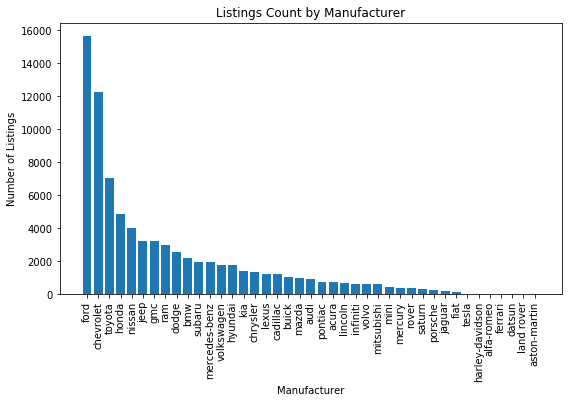

In [18]:
# Chart showing listings count of manufacturers
plt.figure(figsize=(9,5))
plt.bar(manufacturer_counts.index, manufacturer_counts['num_listings'])
plt.title('Listings Count by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Average price and listings per state
state_counts=vehicles_df.groupby('state').agg(
num_listings=('state','size'),
avg_price=('price','median'))

state_counts.reset_index(inplace=True)
state_counts['state'] = state_counts['state'].str.upper()
state_counts

,state,num_listings,avg_price
0,AK,642,20700.0
1,AL,877,10950.0
2,AR,684,7500.0
3,AZ,1646,10000.0
4,CA,8561,9200.0
5,CO,1829,8995.0
6,CT,984,6497.5
7,DC,488,7492.5
8,DE,236,8147.5
9,FL,6284,8700.0


In [20]:
vehicles_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 80170 entries, 31 to 426836
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         80170 non-null  int64         
 1   year          80170 non-null  int64         
 2   manufacturer  80170 non-null  object        
 3   condition     80170 non-null  object        
 4   cylinders     80170 non-null  object        
 5   fuel          80170 non-null  object        
 6   odometer      80170 non-null  float64       
 7   title_status  80170 non-null  object        
 8   transmission  80170 non-null  object        
 9   drive         80170 non-null  object        
 10  size          80170 non-null  object        
 11  type          80170 non-null  object        
 12  paint_color   80170 non-null  object        
 13  state         80170 non-null  object        
 14  posting_date  80170 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), 

## Removing Duplicates

In [21]:
# Show duplicates based on specific columns
duplicate_cols = ['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
duplicates_subset = vehicles_df[vehicles_df.duplicated(subset=duplicate_cols, keep=False)]
sorted_duplicates = duplicates_subset.sort_values(by=duplicate_cols, ascending=False)
sorted_duplicates

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
286323,12345678,2019,chevrolet,good,8 cylinders,gas,100000.0,clean,automatic,4wd,full-size,truck,black,oh,2021-05-04
286324,12345678,2019,chevrolet,good,8 cylinders,gas,100000.0,clean,automatic,4wd,full-size,truck,black,oh,2021-05-04
288400,12345678,2019,chevrolet,good,8 cylinders,gas,100000.0,clean,automatic,4wd,full-size,truck,black,oh,2021-04-05
288401,12345678,2019,chevrolet,good,8 cylinders,gas,100000.0,clean,automatic,4wd,full-size,truck,black,oh,2021-04-05
303014,12345678,2019,chevrolet,good,8 cylinders,gas,100000.0,clean,automatic,4wd,full-size,truck,black,oh,2021-05-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111751,0,1971,mercedes-benz,good,6 cylinders,gas,1234.0,clean,automatic,rwd,full-size,sedan,blue,fl,2021-05-03
116799,0,1971,mercedes-benz,good,6 cylinders,gas,1234.0,clean,automatic,rwd,full-size,sedan,blue,fl,2021-05-03
33964,0,1971,mercedes-benz,good,6 cylinders,gas,1234.0,clean,automatic,rwd,full-size,sedan,blue,ca,2021-05-03
54986,0,1971,mercedes-benz,good,6 cylinders,gas,1234.0,clean,automatic,rwd,full-size,sedan,blue,ca,2021-05-03


In [22]:
# Keep the first occurrence, remove duplicates based on specific columns
duplicate_cols = ['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
df_unique = vehicles_df.drop_duplicates(subset=duplicate_cols)
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65203 entries, 31 to 426836
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         65203 non-null  int64         
 1   year          65203 non-null  int64         
 2   manufacturer  65203 non-null  object        
 3   condition     65203 non-null  object        
 4   cylinders     65203 non-null  object        
 5   fuel          65203 non-null  object        
 6   odometer      65203 non-null  float64       
 7   title_status  65203 non-null  object        
 8   transmission  65203 non-null  object        
 9   drive         65203 non-null  object        
 10  size          65203 non-null  object        
 11  type          65203 non-null  object        
 12  paint_color   65203 non-null  object        
 13  state         65203 non-null  object        
 14  posting_date  65203 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), 

## Removing Outliers: Price

In [23]:
cleaned_df = df_unique.copy()

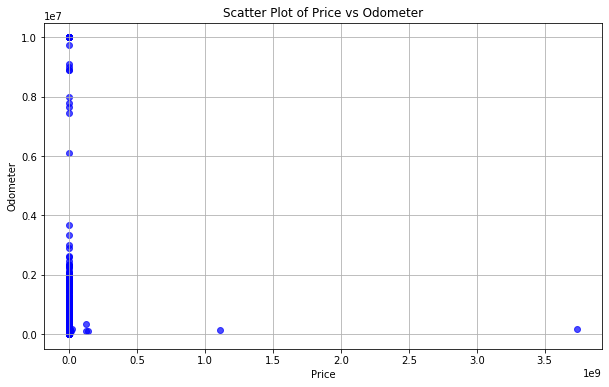

In [24]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df["price"], cleaned_df["odometer"], color="blue", alpha=0.7)
plt.title("Scatter Plot of Price vs Odometer")
plt.ylabel("Odometer")
plt.xlabel("Price")
plt.grid(True)
plt.show()

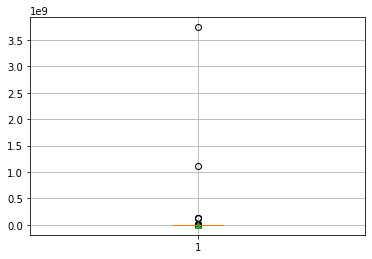

In [25]:
# Plot boxplot for prices
plt.boxplot(cleaned_df['price'], showmeans=True)
plt.grid()
plt.show()

In [26]:
# How many listings above 100k (fake listings)
cleaned_df.loc[cleaned_df['price'] >= 100000].shape

(66, 15)

In [27]:
# How many listings below 500 (fake/misleading listings)
cleaned_df.loc[(cleaned_df['price'] < 500)].shape

(2915, 15)

In [28]:
# How many listings with arbritrary numbers
arb_num_mask = ((cleaned_df['price'] == 123456) | (cleaned_df['price'] == 12345) | (cleaned_df['price'] == 1234))
cleaned_df.loc[arb_num_mask,:].shape

(19, 15)

In [29]:
# Keep listings above 499, below 200000, and remove arbitrary prices
below200k_mask = (cleaned_df['price'] < 100000)
above499_mask = (cleaned_df['price'] > 499)
arb_num_mask = ((cleaned_df['price'] == 123456) | (cleaned_df['price'] == 12345) | (cleaned_df['price'] == 1234))

cleaned_df = cleaned_df.loc[(below200k_mask & above499_mask & ~arb_num_mask),:]
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62208 entries, 31 to 426833
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         62208 non-null  int64         
 1   year          62208 non-null  int64         
 2   manufacturer  62208 non-null  object        
 3   condition     62208 non-null  object        
 4   cylinders     62208 non-null  object        
 5   fuel          62208 non-null  object        
 6   odometer      62208 non-null  float64       
 7   title_status  62208 non-null  object        
 8   transmission  62208 non-null  object        
 9   drive         62208 non-null  object        
 10  size          62208 non-null  object        
 11  type          62208 non-null  object        
 12  paint_color   62208 non-null  object        
 13  state         62208 non-null  object        
 14  posting_date  62208 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), 

In [30]:
# Now look for listings with prices that are actually monthly payments or down payments
mask1 = (cleaned_df['price'] <= 5000)
mask2 = ((cleaned_df['condition'] == 'excellent') | (cleaned_df['condition'] == 'like new') | (cleaned_df['condition'] == 'new'))
mask3 = (cleaned_df['odometer'] < 80000)
mask4 = (cleaned_df['year'] >= 2010)
fake_df = cleaned_df.loc[(mask1 & mask2 & mask3 & mask4),:].sort_values('price', ascending=False)
print(fake_df.shape)

cleaned_df = cleaned_df.loc[~(mask1 & mask2 & mask3 & mask4),:].sort_values('price', ascending=False)
cleaned_df.head(20)

(191, 15)


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
127952,99990,2018,nissan,like new,6 cylinders,gas,1234.0,clean,automatic,4wd,full-size,coupe,white,hi,2021-05-03
53869,99888,1940,ford,excellent,8 cylinders,gas,46113.0,clean,automatic,rwd,full-size,sedan,silver,ca,2021-05-01
35419,99700,2018,ford,excellent,8 cylinders,diesel,31484.0,clean,automatic,4wd,full-size,pickup,grey,ca,2021-05-01
5064,98995,2017,porsche,excellent,8 cylinders,gas,38562.0,clean,automatic,4wd,full-size,hatchback,brown,ak,2021-05-03
122982,98900,2001,ferrari,good,8 cylinders,gas,20187.0,clean,automatic,rwd,mid-size,convertible,red,ga,2021-05-01
347046,98900,2001,ferrari,good,8 cylinders,gas,20187.0,clean,automatic,rwd,mid-size,convertible,red,sc,2021-05-01
112770,98900,2001,ferrari,good,8 cylinders,gas,20187.0,clean,automatic,rwd,mid-size,convertible,red,fl,2021-05-01
346,98900,2001,ferrari,good,8 cylinders,gas,20187.0,clean,automatic,rwd,mid-size,convertible,red,al,2021-05-01
370753,98900,2001,ferrari,good,8 cylinders,gas,20187.0,clean,automatic,rwd,mid-size,convertible,red,tx,2021-05-01
5190,98750,2019,ford,like new,8 cylinders,diesel,47100.0,clean,automatic,4wd,full-size,truck,black,ak,2021-05-02


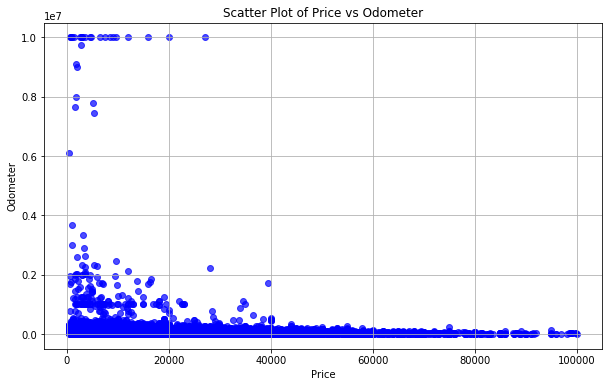

In [31]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df["price"], cleaned_df["odometer"], color="blue", alpha=0.7)
plt.title("Scatter Plot of Price vs Odometer")
plt.ylabel("Odometer")
plt.xlabel("Price")
plt.grid(True)
plt.show()

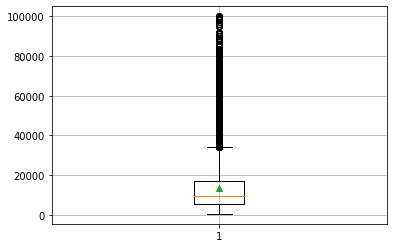

In [32]:
# Plot boxplot for prices
plt.boxplot(cleaned_df['price'], showmeans=True)
plt.grid()
plt.show()

In [33]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62017 entries, 127952 to 228566
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         62017 non-null  int64         
 1   year          62017 non-null  int64         
 2   manufacturer  62017 non-null  object        
 3   condition     62017 non-null  object        
 4   cylinders     62017 non-null  object        
 5   fuel          62017 non-null  object        
 6   odometer      62017 non-null  float64       
 7   title_status  62017 non-null  object        
 8   transmission  62017 non-null  object        
 9   drive         62017 non-null  object        
 10  size          62017 non-null  object        
 11  type          62017 non-null  object        
 12  paint_color   62017 non-null  object        
 13  state         62017 non-null  object        
 14  posting_date  62017 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(

In [34]:
# Export cleaned csv file
cleaned_df.to_csv("data/vehicles_clean.csv", index=False)
